In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd, numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import *
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

# Reading and Understanding the data

In [2]:
data=pd.read_csv('Leads.csv')

In [3]:
data.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [4]:
# checking the dimensions of the dataframe
data.shape

(9240, 37)

In [5]:
# let's look at the statistical aspects of the dataframe
data.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [6]:
# let's see the d-types of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

It appears that this dataset has a significant number of category variables, for which we will need to build dummy variables. Additionally, there are numerous null values, so we must deal them appropriately.

# Data Cleaning and Preparation

In [7]:
# Checking the null values
data.isnull().sum().sort_values()

Prospect ID                                         0
I agree to pay the amount through cheque            0
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
X Education Forums                                  0
A free copy of Mastering The Interview              0
Magazine                                            0
Search                                              0
Newspaper Article                                   0
Last Notable Activity                               0
Lead Number                                         0
Lead Origin                                         0
Total Time Spent on Website                         0
Converted                                           0
Do Not Call                 

As you can see, many columns have a significant number of missing values. These columns are obviously useless. Since our dataframe contains 9000 datapoints, let's remove the columns with more than 3000 missing values as they are useless to us.

In [8]:
# Droping all the columns in which greater than 3000 missing values are present

for column in data.columns:
    if data[column].isnull().sum() > 3000:
        data.drop(column, 1, inplace=True)
        

In [9]:
data.isnull().sum().sort_values()

Prospect ID                                         0
I agree to pay the amount through cheque            0
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
X Education Forums                                  0
Newspaper Article                                   0
Magazine                                            0
Search                                              0
A free copy of Mastering The Interview              0
Last Notable Activity                               0
Do Not Call                                         0
Total Time Spent on Website                         0
Converted                                           0
Do Not Email                                        0
Lead Origin                 

In [10]:
# Let's now check the percentage of missing values in each column

round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

 Lead number and Prospect ID have all unique values which are not very much useful for our data analysis,so we can drop them.

In [11]:
data.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [12]:
data.shape

(9240, 29)

In [13]:
# Lets check null values again:
data.isnull().sum().sort_values()

Lead Origin                                         0
I agree to pay the amount through cheque            0
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
X Education Forums                                  0
Newspaper Article                                   0
Magazine                                            0
A free copy of Mastering The Interview              0
Search                                              0
Total Time Spent on Website                         0
Converted                                           0
Do Not Call                                         0
Do Not Email                                        0
Last Notable Activity                               0
Lead Source                 

There are a few columns with the level "Select," which indicates that students have not chosen an option for that particular column and is the reason for the level "Select" appearing in those few columns. Given that these are null values and won't be helpful to our investigation, we can impute NaN and ignore them.  

In [14]:
# Getting the value counts of all the columns

for column in data:
    print(data[column].astype('category').value_counts())
    print('___________________________________________________')

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
___________________________________________________
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
WeLearn                 1
Pay per Click Ads       1
NC_EDM                  1
blog                    1
testone                 1
welearnblog_Home        1
youtubechannel          1
Name: Lead Source, dtype: int64
___________________________________________________
No     8506
Yes     734
Name: Do Not Email, dtype: int64
___________________________________________________
No     9238
Yes  

In [15]:
# Converting 'Select' values to NaN.
data= data.replace('Select', np.nan)

In [16]:
# Checking the null values again
data.isnull().sum().sort_values(ascending = False)

How did you hear about X Education               7250
Lead Profile                                     6855
City                                             3669
Specialization                                   3380
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
Update me on Supply Chain Content                   0
Get updates on DM Content                           0
Lead Origin                                         0
Digital Advertisement                               0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Through Recommendations     

percentage of missing values in each column

In [17]:
null_value = round(100*(data.isnull().sum()/len(data)), 2).sort_values(ascending=False)
null_value

How did you hear about X Education               78.46
Lead Profile                                     74.19
City                                             39.71
Specialization                                   36.58
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
Update me on Supply Chain Content                 0.00
Get updates on DM Content                         0.00
Lead Origin                                       0.00
Digital Advertisement                             0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Through Re

 We can drop the columns with missing values greater than 45% .

In [18]:
null_value_col= null_value[null_value.values > 45].sort_values(ascending=False)
print(f'''{"*"*80}\nTotal no of columns having null Values > 45 % need to be Dropped are:- {len(null_value_col)}\n{"*"*80}''')
null_value_col

********************************************************************************
Total no of columns having null Values > 45 % need to be Dropped are:- 2
********************************************************************************


How did you hear about X Education    78.46
Lead Profile                          74.19
dtype: float64

In [19]:
#Dropping all columns having Null values greater than 45 %
col=data.columns

for i in col:
    if((100*(data[i].isnull().sum()/len(data.index))) >= 45):
        data.drop(i, 1, inplace = True)

In [20]:
#checking null values percentage AFTER dropping columns with high percentage(>45%) missing values.

round(100*(data.isnull().sum()/len(data)), 2).sort_values(ascending=False)

City                                             39.71
Specialization                                   36.58
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
Update me on Supply Chain Content                 0.00
Lead Origin                                       0.00
Digital Advertisement                             0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Through Recommendations                           0.00
Search                                            0.00
Newspaper 

In [21]:
numeric_cols = []
cat_cols = []

for i, col in data.iteritems():
    unique_values = col.nunique()
    
    if unique_values > 30:
        print(i, unique_values, "----cont_cols")
        numeric_cols.append(i)
    else:
        print(i, unique_values, "----cat_cols")
        cat_cols.append(i)


Lead Origin 5 ----cat_cols
Lead Source 21 ----cat_cols
Do Not Email 2 ----cat_cols
Do Not Call 2 ----cat_cols
Converted 2 ----cat_cols
TotalVisits 41 ----cont_cols
Total Time Spent on Website 1731 ----cont_cols
Page Views Per Visit 114 ----cont_cols
Last Activity 17 ----cat_cols
Country 38 ----cont_cols
Specialization 18 ----cat_cols
What is your current occupation 6 ----cat_cols
What matters most to you in choosing a course 3 ----cat_cols
Search 2 ----cat_cols
Magazine 1 ----cat_cols
Newspaper Article 2 ----cat_cols
X Education Forums 2 ----cat_cols
Newspaper 2 ----cat_cols
Digital Advertisement 2 ----cat_cols
Through Recommendations 2 ----cat_cols
Receive More Updates About Our Courses 1 ----cat_cols
Update me on Supply Chain Content 1 ----cat_cols
Get updates on DM Content 1 ----cat_cols
City 6 ----cat_cols
I agree to pay the amount through cheque 1 ----cat_cols
A free copy of Mastering The Interview 2 ----cat_cols
Last Notable Activity 16 ----cat_cols


In [22]:
numeric_cols=[ 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
cat_cols=['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Converted', 'Last Activity',  
          'What is your current occupation', 'What matters most to you in choosing a course', 
          'Search','Magazine', 'Newspaper Article','X Education Forums', 'Newspaper', 'Digital Advertisement',
          'Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
          'Get updates on DM Content','Country','I agree to pay the amount through cheque',
          'A free copy of Mastering The Interview','Last Notable Activity','Specialization','City']

In [23]:
for i in cat_cols:
    print(i)
    print()
    print(data[i].value_counts())
    print()
    print("Percentage:")
    print(data[i].value_counts(normalize=True) * 100)
    print()


Lead Origin

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

Percentage:
Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64

Lead Source

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Nam

In [24]:
for i in cat_cols:
    if data[i].isnull().sum() > 0:
        mode_value = data[i].mode().iloc[0]
        data[i] = data[i].fillna(mode_value)


In [25]:
# Replacing the null values in continuous columns by median of that respective the colmun
for i in numeric_cols:
    if data[i].isnull().sum()>0:   
        value=data[i].median()
        data[i]=data[i].fillna(value)

In [26]:
#checking all the null values are replaced or not
data.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations        

- Notice that when you received the value counts for all the columns, some of them had only one value that predominated throughout the majority of the data points.These include Do Not Call, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Update me on Supply Chain Content, Get updates on DM Content, I agree to pay the amount through cheque. It is recommended to remove these columns because they won't aid in our research because almost all of the values for these variables are No.

In [27]:
data= data.drop(['Country','What matters most to you in choosing a course','Do Not Call', 'Search', 'Magazine','Newspaper Article', 'X Education Forums','Newspaper',
                  'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                  'Update me on Supply Chain Content','Get updates on DM Content', 
                  'I agree to pay the amount through cheque'], axis=1)

In [28]:
data.describe()

Converted  TotalVisits  Total Time Spent on Website  \
count  9240.000000  9240.000000                  9240.000000   
mean      0.385390     3.438636                   487.698268   
std       0.486714     4.819024                   548.021466   
min       0.000000     0.000000                     0.000000   
25%       0.000000     1.000000                    12.000000   
50%       0.000000     3.000000                   248.000000   
75%       1.000000     5.000000                   936.000000   
max       1.000000   251.000000                  2272.000000   

       Page Views Per Visit  
count           9240.000000  
mean               2.357440  
std                2.145781  
min                0.000000  
25%                1.000000  
50%                2.000000  
75%                3.000000  
max               55.000000

In [29]:
data.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website       Finance Management   
1             Email Opened       Finance Management   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead       Finance Management   

  What is your current occupation    City  \
0                      Unemployed  Mumbai   
1                      Unemployed  Mumbai   
2                         Student  Mumbai   
3                      Unemployed  Mumbai   
4                      Unemployed  Mumbai   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified

### converting some binary variables (Yes/No) to 0/1

In [30]:
data["Do Not Email"].value_counts()


No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [31]:
data["A free copy of Mastering The Interview"].value_counts()

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [32]:
# Replacing the values of yes =1 and No= 0
data["Do Not Email"].replace(to_replace = "No" , value = 0 , inplace = True)
data["Do Not Email"].replace(to_replace = "Yes" , value = 1 , inplace = True)
data["A free copy of Mastering The Interview"].replace(to_replace = "No" , value = 0 , inplace = True)
data["A free copy of Mastering The Interview"].replace(to_replace = "Yes" , value = 1 , inplace = True)

In [33]:
data.head()

Lead Origin     Lead Source  Do Not Email  Converted  \
0                      API      Olark Chat             0          0   
1                      API  Organic Search             0          0   
2  Landing Page Submission  Direct Traffic             0          1   
3  Landing Page Submission  Direct Traffic             0          0   
4  Landing Page Submission          Google             0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website       Finance Management   
1             Email Opened       Finance Management   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead       Finance Management   

  What is your current occupation    City  \
0                      Unemployed  Mumbai   
1                      Unemployed  Mumbai   
2                         Student  Mumbai   
3                      Unemployed  Mumbai   
4                      Unemployed  Mumbai   

   A free copy of Mastering The Interview Last Notable Activity  
0                                       0              Modified  
1                                       0          Email Opened  
2                                       1          Email Opened  
3                                       0              Modified  
4                                       0              Modified

## Outlier Analysis

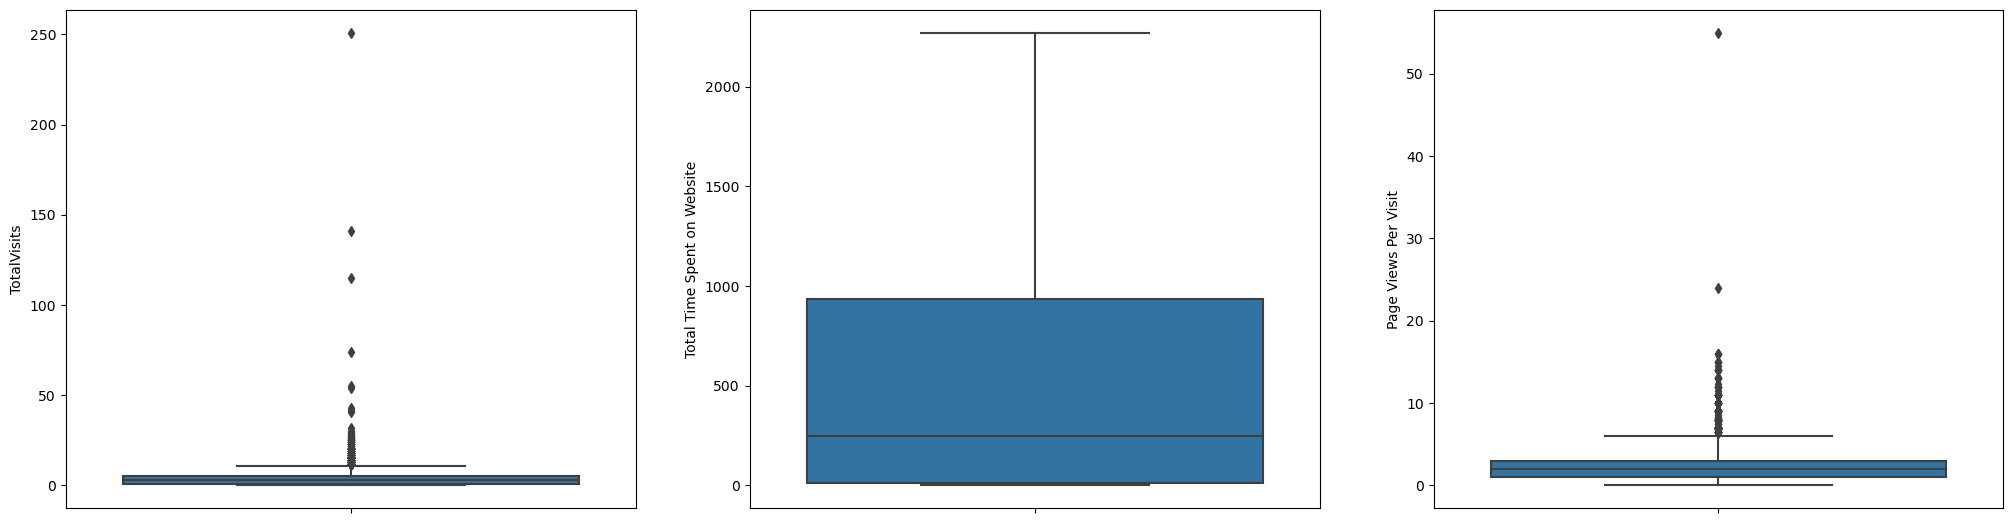

In [34]:
# Check the outliers for all the numeric columns

plt.figure(figsize=(25, 22))
plt.subplot(3,3,1)
sns.boxplot(y = 'TotalVisits', data = data)
plt.subplot(3,3,2)
sns.boxplot(y = 'Total Time Spent on Website', data = data)
plt.subplot(3,3,3)
sns.boxplot(y = 'Page Views Per Visit', data = data)
plt.show()

In [35]:
# Removing values beyond 99% for page Views Per Visit

page_visits = data['Page Views Per Visit'].quantile(0.99)
data = data[data["Page Views Per Visit"] < page_visits]
data["Page Views Per Visit"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9120.000000
mean        2.241274
std         1.828670
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         7.000000
max         8.500000
Name: Page Views Per Visit, dtype: float64

In [36]:
# Checking data again at 25%,50%,75%,90%,95% and above after removing values at 99 percentile
data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

Do Not Email    Converted  TotalVisits  Total Time Spent on Website  \
count   9120.000000  9120.000000  9120.000000                  9120.000000   
mean       0.078838     0.385088     3.322368                   484.721382   
std        0.269500     0.486643     4.655028                   547.609995   
min        0.000000     0.000000     0.000000                     0.000000   
25%        0.000000     0.000000     1.000000                     9.000000   
50%        0.000000     0.000000     3.000000                   246.000000   
75%        0.000000     1.000000     5.000000                   931.000000   
90%        0.000000     1.000000     7.000000                  1379.000000   
95%        1.000000     1.000000     9.000000                  1561.000000   
99%        1.000000     1.000000    16.000000                  1840.810000   
max        1.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  A free copy of Mastering The Interview  
count           9120.000000                             9120.000000  
mean               2.241274                                0.308772  
std                1.828670                                0.462012  
min                0.000000                                0.000000  
25%                1.000000                                0.000000  
50%                2.000000                                0.000000  
75%                3.000000                                1.000000  
90%                5.000000                                1.000000  
95%                6.000000                                1.000000  
99%                7.000000                                1.000000  
max                8.500000                                1.000000

In [37]:
# Finding the percentage of data retained

data_percentage = round(100*(len(data)/9240),2)
print(data_percentage)

98.7


- Based on the information above, the data has been cleaned while keeping up to 98% of it.
- We will conduct data analysis on this cleansed data.

## Data Visualization

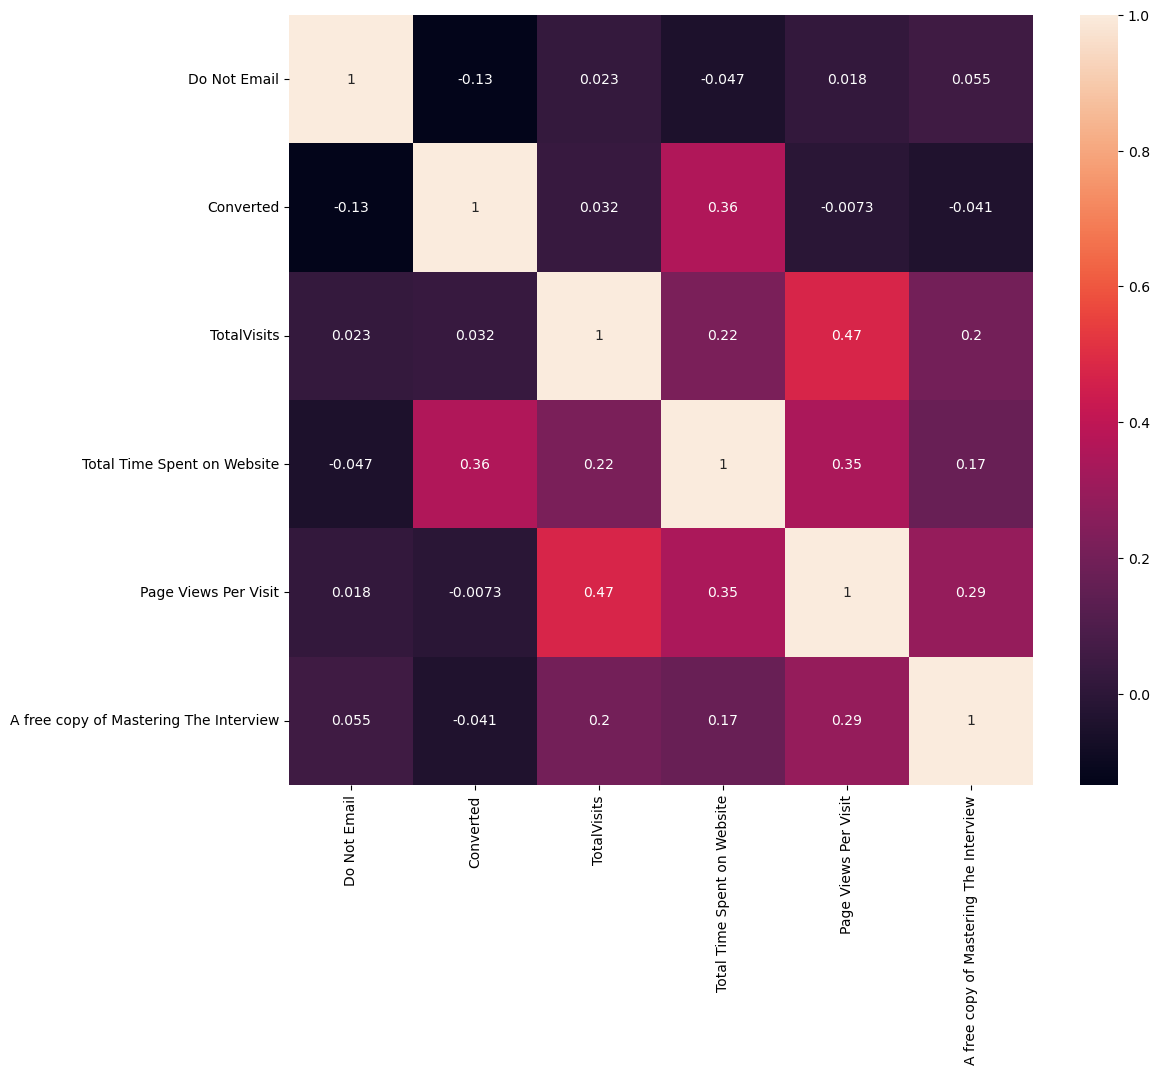

In [38]:
#Checking correlations of numeric values
# figure size
plt.figure(figsize=(12,10))
# heatmap
sns.heatmap(data.corr(),annot=True)
plt.show()

In [39]:
categorical_col1=['Lead Origin', 'Lead Source', 'Last Activity','What is your current occupation']

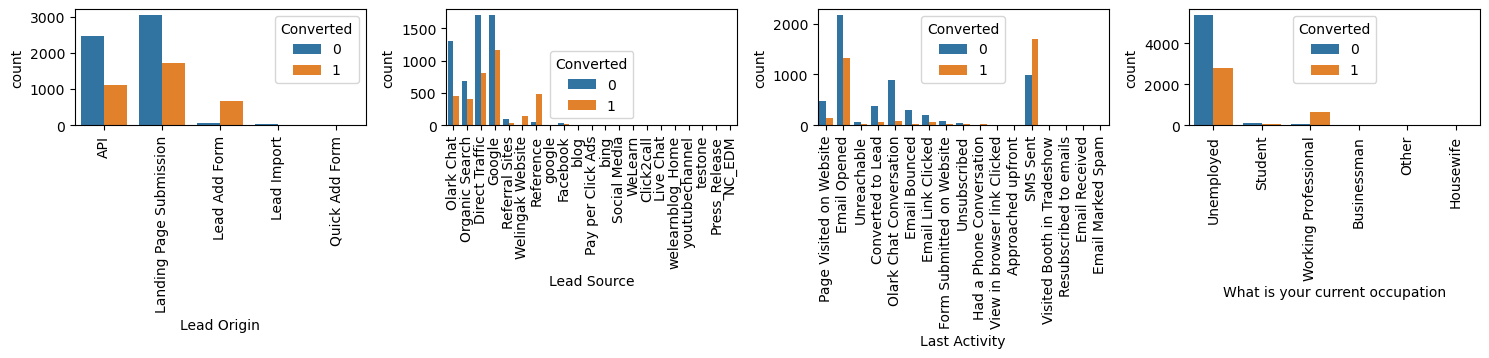

In [40]:
plt.figure(figsize=(15, 5))

for i, col in enumerate(categorical_col1):
    plt.subplot(2, 4, i+1)
    sns.countplot(x=col, hue='Converted', data=data)
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

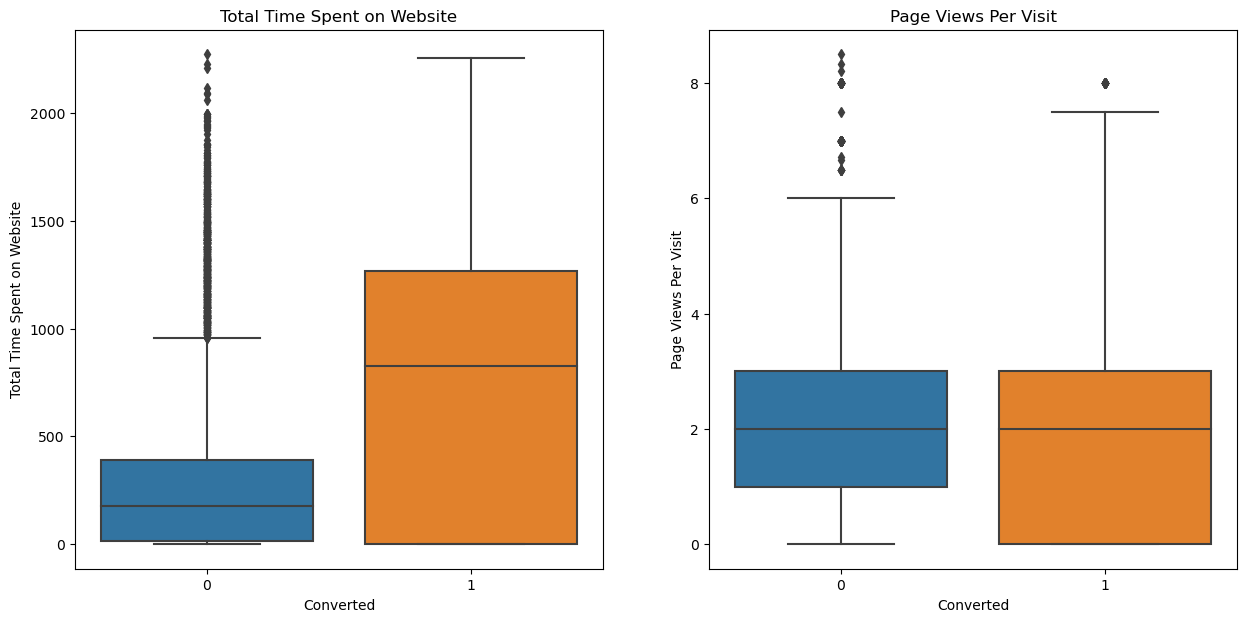

In [41]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
sns.boxplot(data["Converted"] , data["Total Time Spent on Website"])
plt.title("Total Time Spent on Website")

plt.subplot(1,2,2)
sns.boxplot(data["Converted"] , data["Page Views Per Visit"])
plt.title("Page Views Per Visit")

plt.show()

### Categorical Variable Univariate Analysis

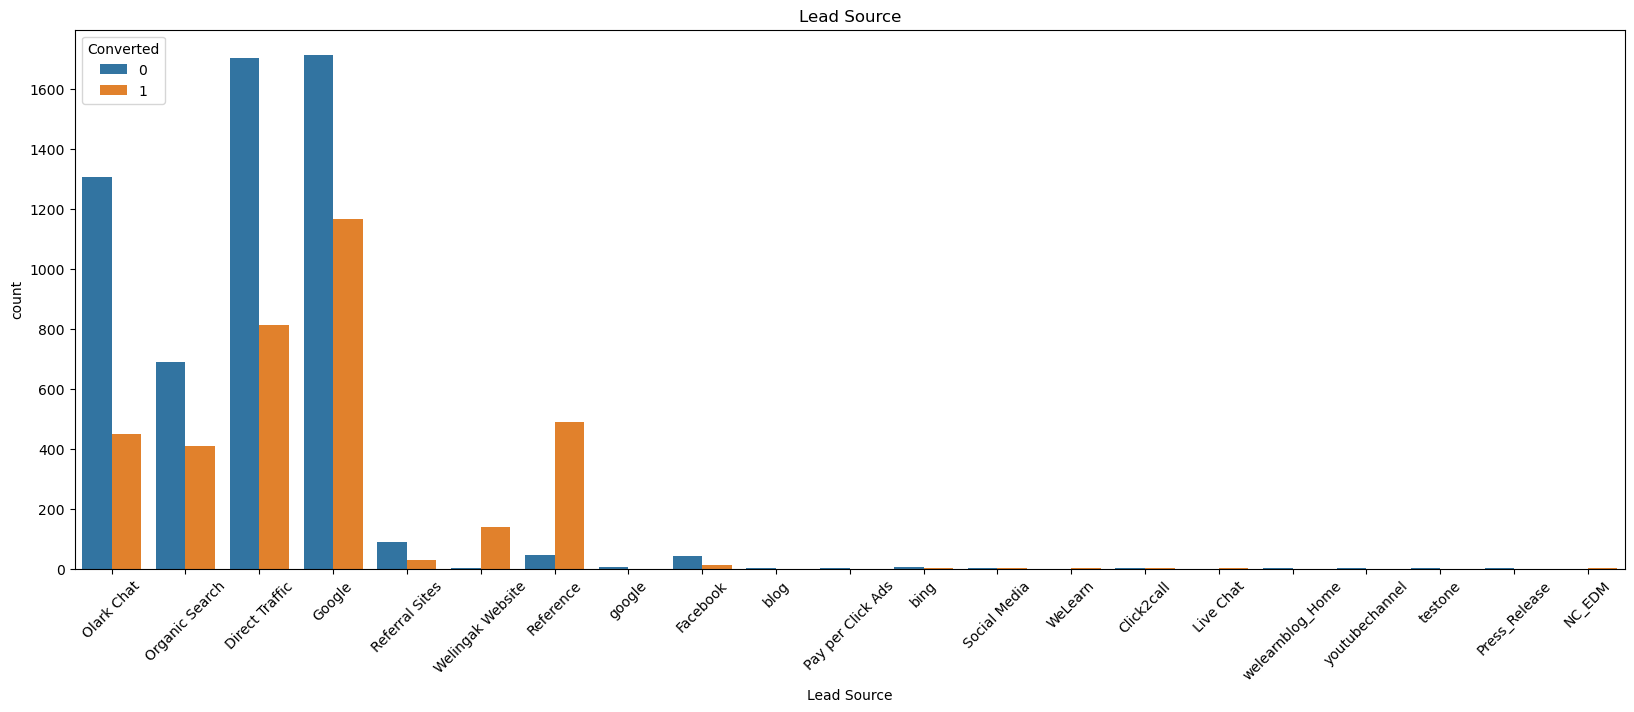

In [42]:
plt.figure(figsize = (20,7))
plt.subplots_adjust(hspace=0.2)

sns.countplot(data['Lead Source'], hue = data.Converted)
plt.title('Lead Source')
plt.xticks(rotation = 45)

plt.show()

-Google has highest conversion rate

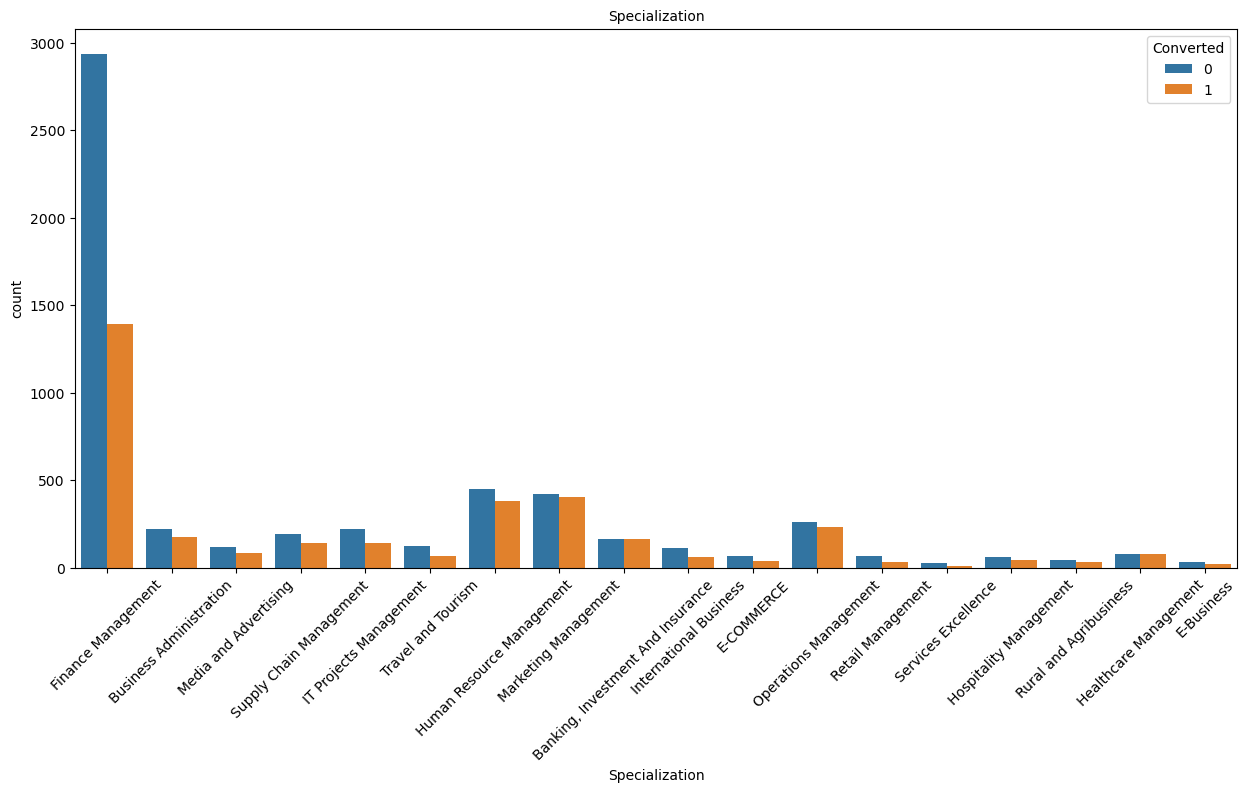

In [43]:
plt.figure(figsize = (15,7))
plt.subplots_adjust(hspace=0.2)
sns.countplot(data['Specialization'], hue = data.Converted)
plt.title('Specialization', fontsize = 10)
plt.xticks(rotation = 45)
plt.show()

Leads from Specialization with unknown or selected columns have the highest conversion rates, according to an inference.

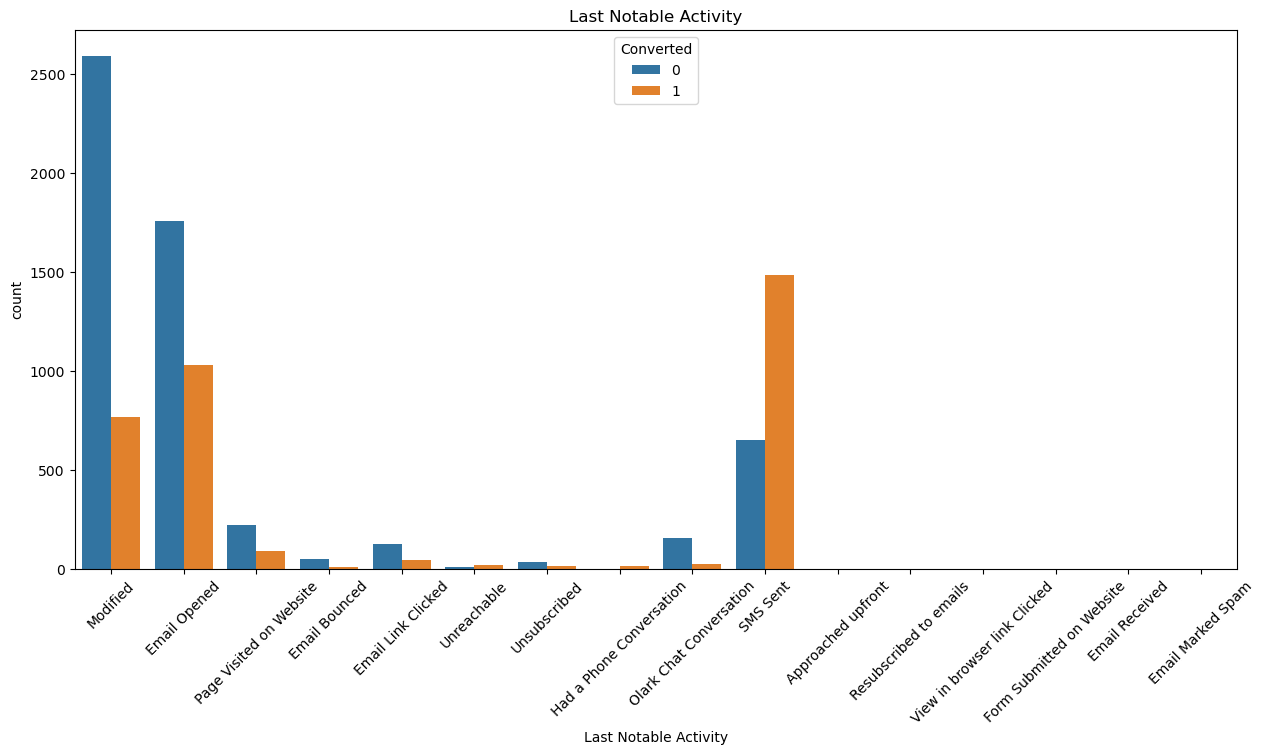

In [44]:
plt.figure(figsize = (15,7))
plt.subplots_adjust(hspace=0.2)
sns.countplot(data['Last Notable Activity'], hue = data.Converted)
plt.title('Last Notable Activity')
plt.xticks(rotation = 45)
plt.show()

The best conversion rate was seen in students whose Last Notable Activity was SMS sent.

## Data Prepration For Modelling

In [45]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(data[['Lead Origin', 'What is your current occupation','City','Specialization','Lead Source', 'Last Activity', 'Last Notable Activity']], drop_first=True)

In [46]:
# Adding the results to the master dataframe
data = pd.concat([data, dummy], axis=1)

In [47]:
data=data.drop(['Lead Origin','What is your current occupation','City','Specialization','Lead Source', 'Last Activity', 'Last Notable Activity'],1)

In [48]:
data.head()

Do Not Email  Converted  TotalVisits  Total Time Spent on Website  \
0             0          0          0.0                            0   
1             0          0          5.0                          674   
2             0          1          2.0                         1532   
3             0          0          1.0                          305   
4             0          1          2.0                         1428   

   Page Views Per Visit  A free copy of Mastering The Interview  \
0                   0.0                                       0   
1                   2.5                                       0   
2                   2.0                                       1   
3                   1.0                                       0   
4                   1.0                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  ...  \
0                        0                           0  ...   
1                        0                           0  ...   
2                        0                           0  ...   
3                        0                           0  ...   
4                        0                           0  ...   

   Last Notable Activity_Form Submitted on Website  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1                                   0   
2                

In [49]:
data.corr()

Do Not Email  Converted  \
Do Not Email                                            1.000000  -0.134518   
Converted                                              -0.134518   1.000000   
TotalVisits                                             0.022834   0.031506   
Total Time Spent on Website                            -0.046502   0.360029   
Page Views Per Visit                                    0.017944  -0.007322   
...                                                          ...        ...   
Last Notable Activity_Resubscribed to emails           -0.003064   0.013233   
Last Notable Activity_SMS Sent                         -0.026536   0.353274   
Last Notable Activity_Unreachable                      -0.010094   0.038956   
Last Notable Activity_Unsubscribed                      0.243378  -0.014994   
Last Notable Activity_View in browser link Clicked     -0.003064  -0.008287   

                                                    TotalVisits  \
Do Not Email                                           0.022834   
Converted                                              0.031506   
TotalVisits                                            1.000000   
Total Time Spent on Website                            0.217914   
Page Views Per Visit                                   0.473698   
...                                                         ...   
Last Notable Activity_Resubscribed to emails          -0.007474   
Last Notable Activity_SMS Sent                        -0.003366   
Last Notable Activity_Unreachable                      0.005264   
Last Notable Activity_Unsubscribed                     0.000057   
Last Notable Activity_View in browser link Clicked     0.010523   

                                                    Total Time Spent on Website  \
Do Not Email                                                          -0.046502   
Converted                                                              0.360029   
TotalVisits                                                            0.217914   
Total Time Spent on Website                                            1.000000   
Page Views Per Visit                                                   0.347946   
...                                                                         ...   
Last Notable Activity_Resubscribed to emails                          -0.009270   
Last Notable Activity_SMS Sent                                         0.124910   
Last Notable Activity_Unreachable                                      0.010506   
Last Notable Activity_Unsubscribed                                     0.001662   
Last Notable Activity_View in browser link Clicked                    -0.007568   

                                                    Page Views Per Visit  \
Do Not Email                                                    0.017944   
Converted                                                      -0.007322   
TotalVisits                                                     0.473698   
Total Time Spent on Website                                     0.347946   
Page Views Per Visit                                            1.000000   
...                                                                  ...   
Last Notable Activity_Resubscribed to emails                   -0.012835   
Last Notable Activity_SMS Sent                                  0.065698   
Last Notable Activity_Unreachable                               0.020534   
Last Notable Activity_Unsubscribed                              0.018116   
Last Notable Activity_View in browser link Clicked              0.002455   

                                                    A free copy of Mastering The Interview  \
Do Not Email                                                                      0.055480   
Converted                                                                        -0.040681   
TotalVisits                                                                       0.198052   
Total Time S

### Splitting the data into training and Splitting sets

In [50]:
# Putting feature variable to X
X = data.drop(['Converted'], axis = 1)


In [51]:
X.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
0             0          0.0                            0   
1             0          5.0                          674   
2             0          2.0                         1532   
3             0          1.0                          305   
4             0          2.0                         1428   

   Page Views Per Visit  A free copy of Mastering The Interview  \
0                   0.0                                       0   
1                   2.5                                       0   
2                   2.0                                       1   
3                   1.0                                       0   
4                   1.0                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   What is your current occupation_Housewife  ...  \
0                                          0  ...   
1                                          0  ...   
2                                          0  ...   
3                                          0  ...   
4                                          0  ...   

   Last Notable Activity_Form Submitted on Website  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                             

In [52]:
y = data['Converted']


In [53]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [54]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

### Minmax scaling

In [55]:
from sklearn.preprocessing import MinMaxScaler

In [56]:
scaler = MinMaxScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits',
                                                                                                              'Total Time Spent on Website',
                                                                                                              'Page Views Per Visit']])


In [57]:
X_train.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
7122             1     0.003984                     0.113556   
4724             0     0.015936                     0.312060   
3974             0     0.023904                     0.091549   
8543             0     0.015936                     0.064701   
5811             0     0.015936                     0.099032   

      Page Views Per Visit  A free copy of Mastering The Interview  \
7122              0.117647                                       0   
4724              0.470588                                       0   
3974              0.705882                                       1   
8543              0.470588                                       1   
5811              0.470588                                       0   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
7122                                    1                          0   
4724                                    1                          0   
3974                                    1                          0   
8543                                    1                          0   
5811                                    1                          0   

      Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
7122                        0                           0   
4724                        0                           0   
3974                        0                           0   
8543                        0                           0   
5811                        0                           0   

      What is your current occupation_Housewife  ...  \
7122                                          0  ...   
4724                                          0  ...   
3974                                          0  ...   
8543                                          0  ...   
5811                                          0  ...   

      Last Notable Activity_Form Submitted on Website  \
7122                                                0   
4724                                                0   
3974                                                0   
8543                                                0   
5811                                                0   

      Last Notable Activity_Had a Phone Conversation  \
7122                                               0   
4724                                               0   
3974                                               0   
8543                                               0   
5811                                               0   

      Last Notable Activity_Modified  \
7122                               1   
4724                               1   
3974                               1   
8543                               0   
5811                               0   

      Last Notable Activity_Olark Chat Conversation  \
7122                                              0   
4724                                              0   
3974                                              0   
8543                                              0   
5811                                              0   

      Last Notable Activity_Page Visited on Website  \
7122                                              0   
4724                                              0   
3974                                              0   
8543                                              0   
5811                                              0   

      Last Notable Activity_Resubscribed to emails  \
7122                                             0   
4724                                             0   
3974                                             0   
8543                                             0   
5811                                             0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
7122                               0                                  0   
4724 

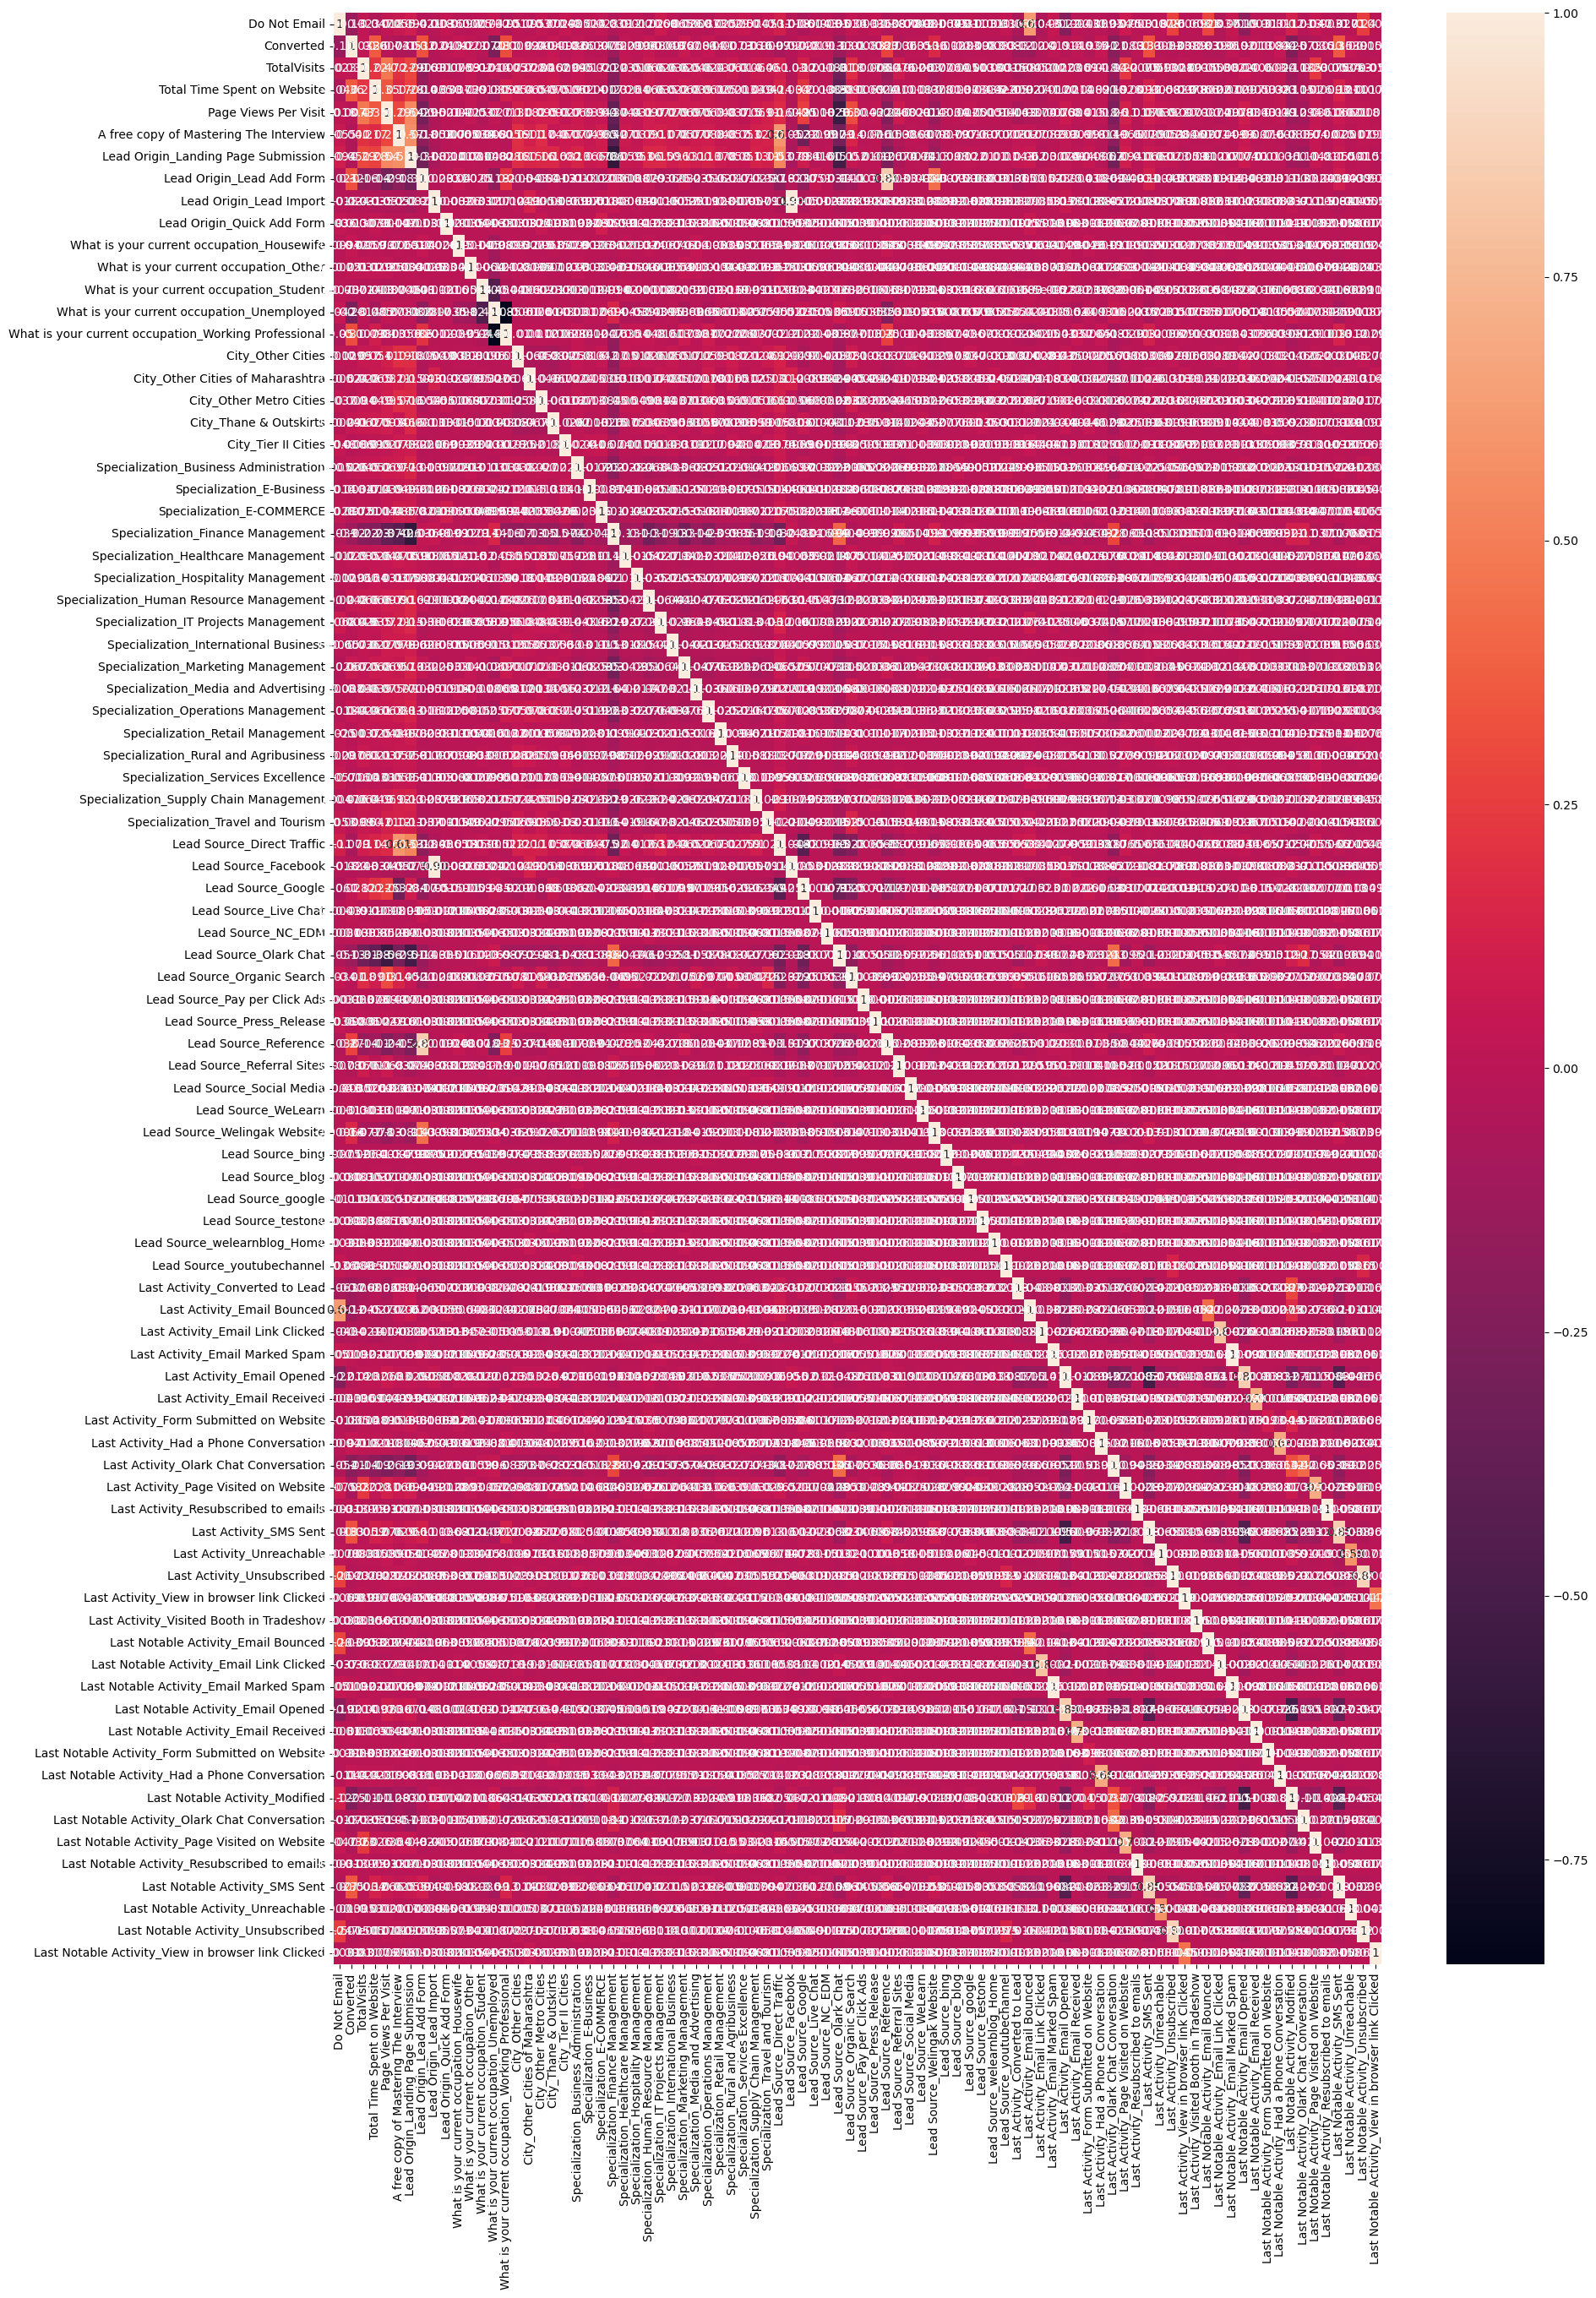

In [58]:
# Heatmap for correlation matrix
plt.figure(figsize=(20,30))
sns.heatmap(data.corr(), annot=True)
plt.show()

### Model Building

In [59]:
import statsmodels.api as sm

In [60]:
# Logistic regression model with StatsModels
X_train=sm.add_constant(X_train)
lgm1=sm.GLM(y_train,X_train, family=sm.families.Binomial())
lgm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6384
Model:                            GLM   Df Residuals:                     6305
Model Family:                Binomial   Df Model:                           78
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 17 Jul 2023   Deviance:                   1.5068e+05
Time:                        09:49:31   Pearson chi2:                 7.37e+18
No. Iterations:                    98   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                  6.63e+15   8.76e+07   7.57e+07      0.000    6.63e+15    6.63e+15
Do Not Email                                         -3.462e+14   4.42e+06  -7.84e+07      0.000   -3.46e+14   -3.46e+14
TotalVisits                                           3.184e+15   4.99e+07   6.38e+07      0.000    3.18e+15    3.18e+15
Total Time Spent on Website                           2.965e+15   3.97e+06   7.46e+08      0.000    2.96e+15    2.96e+15
Page Views Per Visit                                 -4.088e+14      6e+06  -6.81e+07      0.000   -4.09e+14   -4.09e+14
A free copy of Mastering The Interview               -1.929e+13   2.68e+06  -7.19e+06      0.000   -1.93e+13   -1.93e+13
Lead Origin_Landing Page Submission                  -3.041e+14   2.95e+06  -1.03e+08      0.000   -3.04e+14   -3.04e+14
Lead Origin_Lead Add Form                             1.567e+15   1.32e+07   1.19e+08      0.000    1.57e+15    1.57e+15
Lead Origin_Lead Import                               4.544e+14   6.72e+07   6.76e+06      0.000    4.54e+14    4.54e+14
Lead Origin_Quick Add Form                            2.834e+15    6.8e+07   4.17e+07      0.000    2.83e+15    2.83e+15
What is your current occupation_Housewife             2.764e+15   3.41e+07   8.12e+07      0.000    2.76e+15    2.76e+15
What is your current occupation_Other                -1.055e+15   3.27e+07  -3.23e+07      0.000   -1.05e+15   -1.05e+15
What is your current occupation_Student              -8.883e+14   2.62e+07  -3.39e+07      0.000   -8.88e+14   -8.88e+14
What is your current occupation_Unemployed           -1.071e+15   2.56e+07  -4.18e+07      0.000   -1.07e+15   -1.07e+15
What is your current occupation_Working Professional -3.861e+14   2.58e+07   -1.5e+07      0.000   -3.86e+14   -3.86e+14
City_Other Cities                                     1.459e+14   3.44e+06   4.24e+07      0.000    1.46e+14    1.46e+14
City_Other Cities of Maharashtra                      1.657e+14    4.1e+06   4.04e+07      0.000    1.66e+14    1.66e+14
City_Other Metro Cities                               1.312e+14    4.4e+06   2.98e+07      0.000    1.31e+14    1.31e+14
City_Thane & Outskirts                                9.179e+13   3.23e+06   2.84e+07      0.000    9.18e+13    9.18e+13
City_Tier II Cities                                  -3.985e+12   9.62e+06  -4.14e+05      0.000   -3.98e+12   -3.98e+12
Specialization_Business Administration               -2.166e+14   5.93e+06  -3.65e+07      0.000   -2.17e+14   -2.17e+14
Specialization_E-Business                            -3.226e+14   1.16e+07  -2.77e+07      0.000   -3.23e+14   -3.23e+14
Specialization_E-COMMERCE                            -1.88

### Using Recursive Feature Selection

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

logreg = LogisticRegression()
rfe = RFE(estimator=logreg, n_features_to_select=15)
rfe.fit(X_train, y_train)


RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [62]:
rfe.support_

array([False,  True, False,  True, False, False, False,  True, False,
       False,  True, False,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True, False, False, False, False, False, False])

In [63]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('const', False, 55),
 ('Do Not Email', True, 1),
 ('TotalVisits', False, 2),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 12),
 ('A free copy of Mastering The Interview', False, 65),
 ('Lead Origin_Landing Page Submission', False, 17),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 14),
 ('Lead Origin_Quick Add Form', False, 25),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Other', False, 52),
 ('What is your current occupation_Student', True, 1),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', True, 1),
 ('City_Other Cities', False, 44),
 ('City_Other Cities of Maharashtra', False, 40),
 ('City_Other Metro Cities', False, 50),
 ('City_Thane & Outskirts', False, 48),
 ('City_Tier II Cities', False, 51),
 ('Specialization_Business Administration', False, 56),
 ('Specialization_E-Business', False, 62),
 ('Special

In [64]:
# list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Lead Source_Direct Traffic', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website',
       'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [65]:
# list of rfe not supported columns
X_train.columns[~rfe.support_]

Index(['const', 'TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'What is your current occupation_Other',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'City_Tier II Cities', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Special

In [66]:
# Dataset of columns selected by RFE are:
X_train[col].head()

Do Not Email  Total Time Spent on Website  Lead Origin_Lead Add Form  \
7122             1                     0.113556                          0   
4724             0                     0.312060                          0   
3974             0                     0.091549                          0   
8543             0                     0.064701                          0   
5811             0                     0.099032                          0   

      What is your current occupation_Housewife  \
7122                                          0   
4724                                          0   
3974                                          0   
8543                                          0   
5811                                          0   

      What is your current occupation_Student  \
7122                                        0   
4724                                        0   
3974                                        0   
8543                                        0   
5811                                        0   

      What is your current occupation_Unemployed  \
7122                                           1   
4724                                           1   
3974                                           1   
8543                                           1   
5811                                           1   

      What is your current occupation_Working Professional  \
7122                                                  0      
4724                                                  0      
3974                                                  0      
8543                                                  0      
5811                                                  0      

      Lead Source_Direct Traffic  Lead Source_Referral Sites  \
7122                           1                           0   
4724                           0                           0   
3974                           0                           0   
8543                           1                           0   
5811                           0                           0   

      Lead Source_Welingak Website  Last Activity_Had a Phone Conversation  \
7122                             0                                       0   
4724                             0                                       0   
3974                             0                                       0   
8543                             0                                       0   
5811                             0                                       0   

      Last Activity_SMS Sent  Last Notable Activity_Had a Phone Conversation  \
7122                       0                                               0   
4724                       0                                               0   
3974                       0                                               0   
8543                       0                                               0   
5811                       0                                               0   

      Last Notable Activity_Modified  \
7122                               1   
4724                               1   
3974                               1   
8543                               0   
5811                               0   

      Last Notable Activity_Olark Chat Conversation  
7122                                              0  
4724                                              0  
3974                                              0  
8543                                              0  
5811                                              0

In [67]:
# BUILDING MODEL-1
# Fit a Logistic Regression Model on X-train after adding a constant and output the summary 

# Adding constant
X_train_sm = sm.add_constant(X_train[col])

# Running the model
lm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

# Fit a line
res = lm1.fit()

# Checking the model summary
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6384
Model:                            GLM   Df Residuals:                     6368
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2696.9
Date:                Mon, 17 Jul 2023   Deviance:                       5393.8
Time:                        09:49:39   Pearson chi2:                 6.53e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3873
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1988      0.573     -0.347      0.729      -1.323       0.925
Do Not Email                                            -1.2880      0.164     -7.875      0.000      -1.609      -0.967
Total Time Spent on Website                              4.0241      0.146     27.548      0.000       3.738       4.310
Lead Origin_Lead Add Form                                3.3191      0.198     16.745      0.000       2.931       3.708
What is your current occupation_Housewife               22.2781   2.28e+04      0.001      0.999   -4.47e+04    4.48e+04
What is your current occupation_Student                 -1.0576      0.614     -1.722      0.085      -2.261       0.146
What is your current occupation_Unemployed              -1.4681      0.571     -2.569      0.010      -2.588      -0.348
What is your current occupation_Working Professional     1.2950      0.600      2.160      0.031       0.120       2.470
Lead Source_Direct Traffic                              -0.5141      0.078     -6.629      0.000      -0.666      -0.362
Lead Source_Referral Sites                              -0.4301      0.332     -1.297      0.195      -1.080       0.220
Lead Source_Welingak Website                             1.9591      0.745      2.631      0.009       0.500       3.419
Last Activity_Had a Phone Conversation                   0.8103      0.785      1.032      0.302      -0.728       2.349
Last Activity_SMS Sent                                   1.3209      0.074     17.920      0.000       1.176       1.465
Last Notable Activity_Had a Phone Conversation          23.3117   2.06e+04      0.001      0.999   -4.03e+04    4.03e+04
Last Notable Activity_Modified                          -0.9900      0.076    -13.026      0.000      -1.139      -0.841
Last Notable Activity_Olark Chat Conversation           -1.2358      0.318     -3.887      0.000      -1.859      -0.613
========================================================================================================================
"""

-Variance Inflation Factor, or VIF, provides a fundamental quantitative understanding of how much the feature variables are connected with one another. These variables have high p-values (>0.5). In order to test our linear model, it is a crucial parameter.


In [68]:
# Checking the VIF for the new model-
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
5          What is your current occupation_Unemployed  3.50
10             Last Activity_Had a Phone Conversation  1.94
12     Last Notable Activity_Had a Phone Conversation  1.93
1                         Total Time Spent on Website  1.92
13                     Last Notable Activity_Modified  1.76
11                             Last Activity_SMS Sent  1.56
2                           Lead Origin_Lead Add Form  1.53
7                          Lead Source_Direct Traffic  1.49
6   What is your current occupation_Working Profes...  1.42
9                        Lead Source_Welingak Website  1.30
0                                        Do Not Email  1.12
4             What is your current occupation_Student  1.08
14      Last Notable Activity_Olark Chat Conversation  1.07
8                          Lead Source_Referral Sites  1.02
3           What is your current occupation_Housewife  1.01

Let's drop current what is your current occupation_housewife because p-value of this variable is high

In [69]:
# dropping column with high p-value
col = col.drop('What is your current occupation_Housewife',1)

In [70]:
# Building Model 2
X_train_sm = sm.add_constant(X_train[col])
lm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6384
Model:                            GLM   Df Residuals:                     6369
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2698.9
Date:                Mon, 17 Jul 2023   Deviance:                       5397.9
Time:                        09:49:39   Pearson chi2:                 6.53e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3869
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2705      0.523      0.517      0.605      -0.755       1.296
Do Not Email                                            -1.2908      0.164     -7.886      0.000      -1.612      -0.970
Total Time Spent on Website                              4.0235      0.146     27.547      0.000       3.737       4.310
Lead Origin_Lead Add Form                                3.3206      0.198     16.762      0.000       2.932       3.709
What is your current occupation_Student                 -1.5255      0.568     -2.687      0.007      -2.638      -0.413
What is your current occupation_Unemployed              -1.9362      0.521     -3.714      0.000      -2.958      -0.914
What is your current occupation_Working Professional     0.8271      0.552      1.498      0.134      -0.255       1.909
Lead Source_Direct Traffic                              -0.5180      0.078     -6.678      0.000      -0.670      -0.366
Lead Source_Referral Sites                              -0.4312      0.332     -1.300      0.194      -1.081       0.219
Lead Source_Welingak Website                             1.9566      0.745      2.627      0.009       0.497       3.416
Last Activity_Had a Phone Conversation                   0.8093      0.785      1.031      0.303      -0.729       2.348
Last Activity_SMS Sent                                   1.3210      0.074     17.919      0.000       1.176       1.465
Last Notable Activity_Had a Phone Conversation          22.3129   1.25e+04      0.002      0.999   -2.44e+04    2.45e+04
Last Notable Activity_Modified                          -0.9894      0.076    -13.025      0.000      -1.138      -0.841
Last Notable Activity_Olark Chat Conversation           -1.2365      0.318     -3.889      0.000      -1.860      -0.613
========================================================================================================================
"""

In [71]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
4          What is your current occupation_Unemployed  3.49
9              Last Activity_Had a Phone Conversation  1.94
11     Last Notable Activity_Had a Phone Conversation  1.93
1                         Total Time Spent on Website  1.92
12                     Last Notable Activity_Modified  1.76
10                             Last Activity_SMS Sent  1.56
2                           Lead Origin_Lead Add Form  1.52
6                          Lead Source_Direct Traffic  1.49
5   What is your current occupation_Working Profes...  1.42
8                        Lead Source_Welingak Website  1.30
0                                        Do Not Email  1.12
3             What is your current occupation_Student  1.08
13      Last Notable Activity_Olark Chat Conversation  1.07
7                          Lead Source_Referral Sites  1.02

 dropping the variable with the higher P value : Last Notable Activity_Had a Phone Conversation**

In [72]:
# dropping column with high p-value
col = col.drop('Last Notable Activity_Had a Phone Conversation',1)

In [73]:
# BUILDING MODEL-3
X_train_sm = sm.add_constant(X_train[col])
lm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6384
Model:                            GLM   Df Residuals:                     6370
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2702.7
Date:                Mon, 17 Jul 2023   Deviance:                       5405.4
Time:                        09:49:40   Pearson chi2:                 6.79e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3862
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2786      0.523      0.533      0.594      -0.746       1.303
Do Not Email                                            -1.2892      0.164     -7.878      0.000      -1.610      -0.968
Total Time Spent on Website                              4.0157      0.146     27.520      0.000       3.730       4.302
Lead Origin_Lead Add Form                                3.3116      0.198     16.713      0.000       2.923       3.700
What is your current occupation_Student                 -1.5271      0.568     -2.690      0.007      -2.640      -0.414
What is your current occupation_Unemployed              -1.9378      0.521     -3.718      0.000      -2.959      -0.916
What is your current occupation_Working Professional     0.8216      0.552      1.489      0.137      -0.260       1.903
Lead Source_Direct Traffic                              -0.5181      0.077     -6.687      0.000      -0.670      -0.366
Lead Source_Referral Sites                              -0.4578      0.335     -1.367      0.172      -1.114       0.199
Lead Source_Welingak Website                             1.9643      0.745      2.638      0.008       0.505       3.424
Last Activity_Had a Phone Conversation                   2.1565      0.623      3.463      0.001       0.936       3.377
Last Activity_SMS Sent                                   1.3190      0.074     17.899      0.000       1.175       1.463
Last Notable Activity_Modified                          -1.0002      0.076    -13.182      0.000      -1.149      -0.851
Last Notable Activity_Olark Chat Conversation           -1.2406      0.318     -3.903      0.000      -1.864      -0.618
========================================================================================================================
"""

In [74]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
4          What is your current occupation_Unemployed  3.48
1                         Total Time Spent on Website  1.92
11                     Last Notable Activity_Modified  1.75
10                             Last Activity_SMS Sent  1.56
2                           Lead Origin_Lead Add Form  1.52
6                          Lead Source_Direct Traffic  1.49
5   What is your current occupation_Working Profes...  1.42
8                        Lead Source_Welingak Website  1.29
0                                        Do Not Email  1.12
3             What is your current occupation_Student  1.07
12      Last Notable Activity_Olark Chat Conversation  1.07
7                          Lead Source_Referral Sites  1.02
9              Last Activity_Had a Phone Conversation  1.01

In [75]:
col = col.drop('Lead Source_Referral Sites',1)

In [76]:
# Building Model-4
X_train_sm = sm.add_constant(X_train[col])
lm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6384
Model:                            GLM   Df Residuals:                     6371
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2703.7
Date:                Mon, 17 Jul 2023   Deviance:                       5407.4
Time:                        09:49:40   Pearson chi2:                 6.78e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3860
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2763      0.523      0.528      0.597      -0.749       1.301
Do Not Email                                            -1.2901      0.164     -7.885      0.000      -1.611      -0.969
Total Time Spent on Website                              4.0107      0.146     27.496      0.000       3.725       4.297
Lead Origin_Lead Add Form                                3.3189      0.198     16.752      0.000       2.931       3.707
What is your current occupation_Student                 -1.5278      0.568     -2.691      0.007      -2.641      -0.415
What is your current occupation_Unemployed              -1.9445      0.521     -3.731      0.000      -2.966      -0.923
What is your current occupation_Working Professional     0.8144      0.552      1.475      0.140      -0.267       1.896
Lead Source_Direct Traffic                              -0.5102      0.077     -6.602      0.000      -0.662      -0.359
Lead Source_Welingak Website                             1.9638      0.745      2.637      0.008       0.504       3.423
Last Activity_Had a Phone Conversation                   2.1463      0.625      3.436      0.001       0.922       3.370
Last Activity_SMS Sent                                   1.3259      0.074     18.029      0.000       1.182       1.470
Last Notable Activity_Modified                          -1.0001      0.076    -13.183      0.000      -1.149      -0.851
Last Notable Activity_Olark Chat Conversation           -1.2383      0.318     -3.896      0.000      -1.861      -0.615
========================================================================================================================
"""

In [77]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
4          What is your current occupation_Unemployed  3.45
1                         Total Time Spent on Website  1.92
10                     Last Notable Activity_Modified  1.75
9                              Last Activity_SMS Sent  1.55
2                           Lead Origin_Lead Add Form  1.52
6                          Lead Source_Direct Traffic  1.48
5   What is your current occupation_Working Profes...  1.41
7                        Lead Source_Welingak Website  1.29
0                                        Do Not Email  1.12
3             What is your current occupation_Student  1.07
11      Last Notable Activity_Olark Chat Conversation  1.07
8              Last Activity_Had a Phone Conversation  1.01

In [78]:
col = col.drop('What is your current occupation_Working Professional',1)

In [79]:
# Building Model-5
X_train_sm = sm.add_constant(X_train[col])
lm5= sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6384
Model:                            GLM   Df Residuals:                     6372
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2704.7
Date:                Mon, 17 Jul 2023   Deviance:                       5409.4
Time:                        09:49:40   Pearson chi2:                 6.72e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3858
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             1.0113      0.182      5.554      0.000       0.654       1.368
Do Not Email                                     -1.2902      0.164     -7.883      0.000      -1.611      -0.969
Total Time Spent on Website                       4.0091      0.146     27.488      0.000       3.723       4.295
Lead Origin_Lead Add Form                         3.3177      0.198     16.744      0.000       2.929       3.706
What is your current occupation_Student          -2.2618      0.288     -7.854      0.000      -2.826      -1.697
What is your current occupation_Unemployed       -2.6793      0.178    -15.035      0.000      -3.029      -2.330
Lead Source_Direct Traffic                       -0.5111      0.077     -6.614      0.000      -0.663      -0.360
Lead Source_Welingak Website                      1.9645      0.745      2.638      0.008       0.505       3.424
Last Activity_Had a Phone Conversation            2.1494      0.624      3.443      0.001       0.926       3.373
Last Activity_SMS Sent                            1.3287      0.073     18.082      0.000       1.185       1.473
Last Notable Activity_Modified                   -1.0019      0.076    -13.206      0.000      -1.151      -0.853
Last Notable Activity_Olark Chat Conversation    -1.2381      0.318     -3.896      0.000      -1.861      -0.615
=================================================================================================================
"""

In [80]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
4      What is your current occupation_Unemployed  2.93
1                     Total Time Spent on Website  1.73
9                  Last Notable Activity_Modified  1.68
8                          Last Activity_SMS Sent  1.46
5                      Lead Source_Direct Traffic  1.45
2                       Lead Origin_Lead Add Form  1.35
6                    Lead Source_Welingak Website  1.27
0                                    Do Not Email  1.12
3         What is your current occupation_Student  1.06
10  Last Notable Activity_Olark Chat Conversation  1.06
7          Last Activity_Had a Phone Conversation  1.01

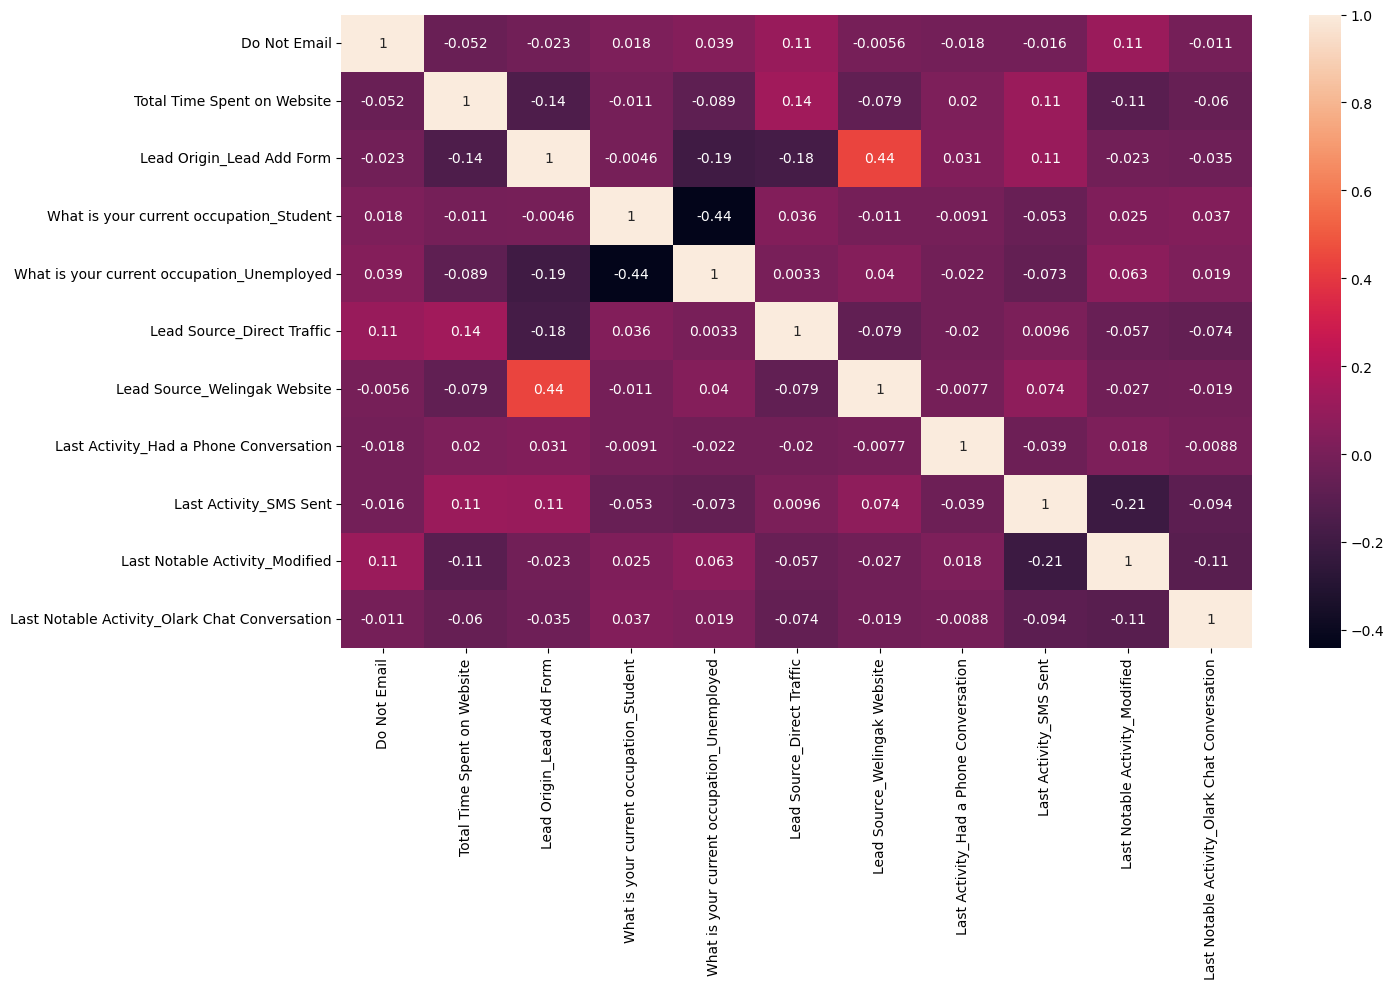

In [81]:
# Checking & Verifying & Validating Correlations Again:
plt.figure(figsize=(15,10))

corr = X_train[col].corr()
sns.heatmap(corr, annot=True)

plt.tight_layout()
plt.show()

## Model Prediction

In [82]:
# Predicting the probabilities (of the "converted" value being 1) on the train set
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.01770812, 0.19486033, 0.09089347, 0.12789714, 0.21910117,
       0.15869948, 0.23078944, 0.37688427, 0.06477901, 0.85764088])

In [83]:
#Creating a dataframe with the actual converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect Id'] = y_train.index
y_train_pred_final.head()

Converted  Converted_Prob  Prospect Id
0          0        0.017708         7122
1          1        0.194860         4724
2          0        0.090893         3974
3          0        0.127897         8543
4          0        0.219101         5811

Now we will devise a dataframe having a new column 'predicted' with 1 if Converted_Prob > 0.5 else 0.

In [84]:
#Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Prospect Id  predicted
0          0        0.017708         7122          0
1          1        0.194860         4724          0
2          0        0.090893         3974          0
3          0        0.127897         8543          0
4          0        0.219101         5811          0

### Model Evaluation

In [85]:
confusion = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3465  448]
 [ 816 1655]]


In [86]:
# checking the overall accuracy
print(accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8020050125313283


In [87]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [88]:
# Checking the sensitivity 
TP / float(TP+FN)

0.669769324160259

In [89]:
# Let us calculate specificity
TN / float(TN+FP)

0.8855098389982111

In [90]:
# Calculate false postive rate - predicting non conversion when leads have converted
print(FP/ float(TN+FP))

0.11449016100178891


In [91]:
# positive predictive value 
print (TP / float(TP+FP))

0.7869709938183548


In [92]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8093903293622985


## Plotting ROC Curve

In [93]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [94]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

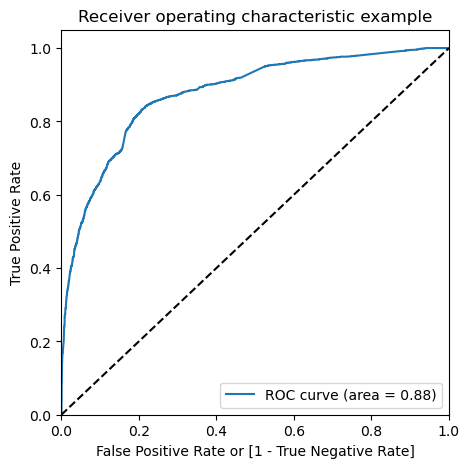

In [95]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

The area under the curve of the ROC is nearly equal to 1 which is quite good. so we seem to have a good model. 

## Finding Optimal Cutoff Point

In [96]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Prospect Id  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.017708         7122          0    1    0    0    0    0   
1          1        0.194860         4724          0    1    1    0    0    0   
2          0        0.090893         3974          0    1    0    0    0    0   
3          0        0.127897         8543          0    1    1    0    0    0   
4          0        0.219101         5811          0    1    1    1    0    0   

   0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0  
1    0    0    0    0    0  
2    0    0    0    0    0  
3    0    0    0    0    0  
4    0    0    0    0    0

In [97]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix


num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.387061  1.000000  0.000000
0.1   0.1  0.590539  0.967624  0.352415
0.2   0.2  0.734179  0.896803  0.631485
0.3   0.3  0.801692  0.847835  0.772553
0.4   0.4  0.810150  0.782679  0.827498
0.5   0.5  0.802005  0.669769  0.885510
0.6   0.6  0.795113  0.589235  0.925121
0.7   0.7  0.781485  0.513153  0.950933
0.8   0.8  0.760025  0.426548  0.970611
0.9   0.9  0.713659  0.276002  0.990033


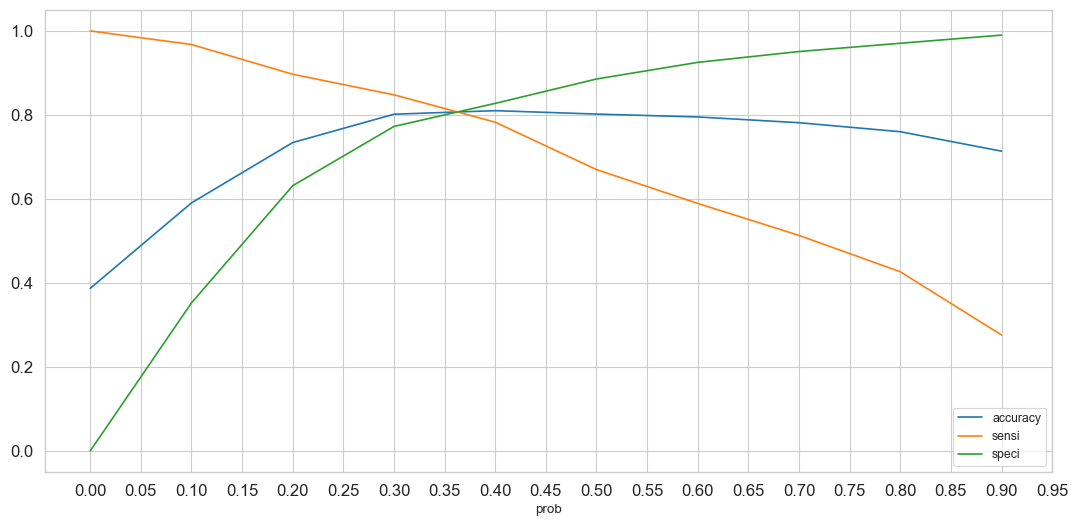

In [98]:
#Plotting Graph
# Let's plot accuracy sensitivity and specificity for various probabilities.
sns.set_style("whitegrid") 
sns.set_context("paper") 
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'], figsize=(13,6))
# plot x axis limits
plt.xticks(np.arange(0, 1, step=0.05), size = 12)
plt.yticks(size = 12)
plt.show()

Evaluating the model with optimal probability cutoff as 0.36

In [99]:
# Evaluating the model with optimal probability cutoff as 0.34
y_train_pred_final['final_Predicted']=y_train_pred_final.Converted_Prob.map(lambda x: 1 if x>0.34 else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Prospect Id  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.017708         7122          0    1    0    0    0    0   
1          1        0.194860         4724          0    1    1    0    0    0   
2          0        0.090893         3974          0    1    0    0    0    0   
3          0        0.127897         8543          0    1    1    0    0    0   
4          0        0.219101         5811          0    1    1    1    0    0   

   0.5  0.6  0.7  0.8  0.9  final_Predicted  
0    0    0    0    0    0                0  
1    0    0    0    0    0                0  
2    0    0    0    0    0                0  
3    0    0    0    0    0                0  
4    0    0    0    0    0                0

In [100]:
# Now let us calculate the lead score

y_train_pred_final['lead_score_board'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final[['Converted','Converted_Prob','Prospect Id','final_Predicted','lead_score_board']].head(10)

Converted  Converted_Prob  Prospect Id  final_Predicted  lead_score_board
0          0        0.017708         7122                0                 2
1          1        0.194860         4724                0                19
2          0        0.090893         3974                0                 9
3          0        0.127897         8543                0                13
4          0        0.219101         5811                0                22
5          0        0.158699         6497                0                16
6          1        0.230789          309                0                23
7          0        0.376884         7069                1                38
8          0        0.064779         8041                0                 6
9          0        0.857641         6825                1                86

In [101]:
#Lets check  accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted))

0.8081140350877193


In [102]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3127,  786],
       [ 439, 2032]], dtype=int64)

In [103]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [104]:
# Sensitivity 
TP / float(TP+FN)

0.8223391339538648

In [105]:
# specificity
TN / float(TN+FP)

0.7991311014566829

In [106]:
# false postive rate
print(FP/ float(TN+FP))

0.20086889854331716


In [107]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7210787792760823


In [108]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8768928771733034


In [109]:
#Accuracy : 80.81%
#Sensitivity : 82.23%
#Specificity : 79.91%

In [110]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)
confusion

array([[3127,  786],
       [ 439, 2032]], dtype=int64)

In [111]:
# Precision:
pre= TP/ (TP + FP)
pre

0.7210787792760823

In [112]:
# Recall:
rec=TP/ (TP + FN)
rec

0.8223391339538648

In [113]:
F1 = 2*(pre*rec)/(pre+rec)
F1

0.7683872187559085

In [114]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

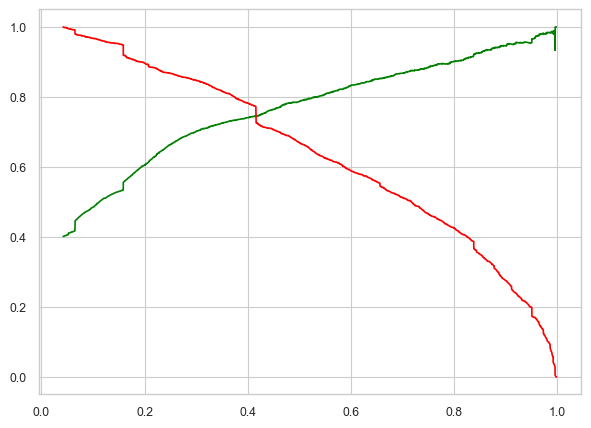

In [115]:
plt.figure(figsize=[7,5])
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Making Predictions on test set

In [116]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])

In [117]:
X_test = X_test[col]
X_test.head()

Do Not Email  Total Time Spent on Website  Lead Origin_Lead Add Form  \
3605             0                     0.078785                          0   
5254             0                     0.130282                          0   
962              0                     0.465669                          0   
6375             0                     0.000000                          1   
7402             0                     0.000000                          0   

      What is your current occupation_Student  \
3605                                        0   
5254                                        0   
962                                         0   
6375                                        0   
7402                                        1   

      What is your current occupation_Unemployed  Lead Source_Direct Traffic  \
3605                                           1                           0   
5254                                           1                           0   
962                                            1                           0   
6375                                           0                           0   
7402                                           0                           0   

      Lead Source_Welingak Website  Last Activity_Had a Phone Conversation  \
3605                             0                                       0   
5254                             0                                       0   
962                              0                                       0   
6375                             0                                       0   
7402                             0                                       0   

      Last Activity_SMS Sent  Last Notable Activity_Modified  \
3605                       0                               1   
5254                       0                               0   
962                        0                               1   
6375                       0                               1   
7402                       0                               0   

      Last Notable Activity_Olark Chat Conversation  
3605                                              0  
5254                                              0  
962                                               0  
6375                                              0  
7402                                              0

In [118]:
print(y_test.shape)
print(X_test.shape)

(2736,)
(2736, 11)


In [119]:
#Add constant to X_test
X_test_sm = sm.add_constant(X_test)

In [120]:
# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3605    0.086753
5254    0.241288
962     0.309405
6375    0.965349
7402    0.222616
2554    0.123609
6175    0.951736
3313    0.472715
3658    0.167612
2405    0.640674
dtype: float64

In [121]:
# Converting y_pred to a dataframe which is an array
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

0
3605  0.086753
5254  0.241288
962   0.309405
6375  0.965349
7402  0.222616

In [122]:
# Converting y_test to dataframe
y_test_dataframe = pd.DataFrame(y_test)

In [123]:
y_test_dataframe['Prospect Id'] = y_test_dataframe.index

In [124]:
# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_dataframe.reset_index(drop=True, inplace=True)

In [125]:
# Appending y_test_dataframe and y_test_pred
y_pred_final = pd.concat([y_test_dataframe, y_test_pred],axis=1)

In [126]:
# Checking the head() of the final dataframe
y_pred_final.head()

Converted  Prospect Id         0
0          0         3605  0.086753
1          0         5254  0.241288
2          1          962  0.309405
3          1         6375  0.965349
4          0         7402  0.222616

In [127]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [128]:
y_pred_final['Lead_Score_Board'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_pred_final.head()

Converted  Prospect Id  Converted_Prob  Lead_Score_Board
0          0         3605        0.086753                 9
1          0         5254        0.241288                24
2          1          962        0.309405                31
3          1         6375        0.965349                97
4          0         7402        0.222616                22

In [129]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect Id','Converted','Converted_Prob', 'Lead_Score_Board'], axis=1)

In [130]:
# Let's see the head of y_pred_final
y_pred_final.head()

Prospect Id  Converted  Converted_Prob  Lead_Score_Board
0         3605          0        0.086753                 9
1         5254          0        0.241288                24
2          962          1        0.309405                31
3         6375          1        0.965349                97
4         7402          0        0.222616                22

In [131]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.36 else 0)
y_pred_final.head()

Prospect Id  Converted  Converted_Prob  Lead_Score_Board  final_predicted
0         3605          0        0.086753                 9                0
1         5254          0        0.241288                24                0
2          962          1        0.309405                31                0
3         6375          1        0.965349                97                1
4         7402          0        0.222616                22                0

In [132]:
## Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7964181286549707

In [133]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted)
confusion2

array([[1335,  360],
       [ 197,  844]], dtype=int64)

In [134]:
array([[1306,  337],
       [ 195,  871]], dtype=int64)

array([[1306,  337],
       [ 195,  871]], dtype=int64)

In [135]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [136]:
#  sensitivity 
TP / float(TP+FN)

0.8107588856868396

In [137]:
# specificity
TN / float(TN+FP)

0.7876106194690266

In [138]:
#Accuracy: 79.64%
#Sensitivity: 81.07%
#Specificity: 78.76.%

In [139]:
precision_score(y_pred_final.Converted , y_pred_final.final_predicted)

0.7009966777408638

In [140]:
recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8107588856868396

In [141]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.21238938053097345


In [142]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7009966777408638


In [143]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8714099216710183


## Lead Score

In [144]:
data_test_pred = y_pred_final.copy()
data_test_pred.head()

Prospect Id  Converted  Converted_Prob  Lead_Score_Board  final_predicted
0         3605          0        0.086753                 9                0
1         5254          0        0.241288                24                0
2          962          1        0.309405                31                0
3         6375          1        0.965349                97                1
4         7402          0        0.222616                22                0

In [145]:
# Selecting the train dataset along with the Conversion Probability and final predicted value for 'Converted'
data_train_pred = y_train_pred_final.copy()
data_train_pred.head()

Converted  Converted_Prob  Prospect Id  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.017708         7122          0    1    0    0    0    0   
1          1        0.194860         4724          0    1    1    0    0    0   
2          0        0.090893         3974          0    1    0    0    0    0   
3          0        0.127897         8543          0    1    1    0    0    0   
4          0        0.219101         5811          0    1    1    1    0    0   

   0.5  0.6  0.7  0.8  0.9  final_Predicted  lead_score_board  
0    0    0    0    0    0                0                 2  
1    0    0    0    0    0                0                19  
2    0    0    0    0    0                0                 9  
3    0    0    0    0    0                0                13  
4    0    0    0    0    0                0                22

In [146]:
# Dropping unnecessary columns from train dataset
data_train_pred = data_train_pred[['Prospect Id','Converted','Converted_Prob','final_Predicted']]
data_train_pred.head()

Prospect Id  Converted  Converted_Prob  final_Predicted
0         7122          0        0.017708                0
1         4724          1        0.194860                0
2         3974          0        0.090893                0
3         8543          0        0.127897                0
4         5811          0        0.219101                0

In [147]:
data_test_pred = data_test_pred[['Prospect Id','Converted','Converted_Prob','final_predicted']]
data_test_pred.head()

Prospect Id  Converted  Converted_Prob  final_predicted
0         3605          0        0.086753                0
1         5254          0        0.241288                0
2          962          1        0.309405                0
3         6375          1        0.965349                1
4         7402          0        0.222616                0

In [148]:
# Concatenating the 2 dataframes train and test along the rows with the append() function
data_full_pred = data_train_pred.append(data_test_pred)
data_full_pred.head()

Prospect Id  Converted  Converted_Prob  final_Predicted  final_predicted
0         7122          0        0.017708              0.0              NaN
1         4724          1        0.194860              0.0              NaN
2         3974          0        0.090893              0.0              NaN
3         8543          0        0.127897              0.0              NaN
4         5811          0        0.219101              0.0              NaN

In [149]:
# Calculating the Lead Score value
# Lead Score = 100 * Conversion_Prob
data_full_pred['Lead_Score'] = data_full_pred['Converted_Prob'].apply(lambda x : round(x*100))
data_full_pred.head()

Prospect Id  Converted  Converted_Prob  final_Predicted  final_predicted  \
0         7122          0        0.017708              0.0              NaN   
1         4724          1        0.194860              0.0              NaN   
2         3974          0        0.090893              0.0              NaN   
3         8543          0        0.127897              0.0              NaN   
4         5811          0        0.219101              0.0              NaN   

   Lead_Score  
0           2  
1          19  
2           9  
3          13  
4          22

In [150]:
data_full_pred.shape

(9120, 6)

In [151]:
data_full_pred = data_full_pred.set_index('Prospect Id').sort_index(axis = 0, ascending = True)
data_full_pred.head()

Converted  Converted_Prob  final_Predicted  final_predicted  \
Prospect Id                                                                
0                    0        0.064779              NaN              0.0   
1                    0        0.382576              1.0              NaN   
2                    1        0.719439              1.0              NaN   
3                    0        0.066438              NaN              0.0   
4                    1        0.462566              1.0              NaN   

             Lead_Score  
Prospect Id              
0                     6  
1                    38  
2                    72  
3                     7  
4                    46

## Determining HOT LEADS with 89% accuracy more than 80% Conversion Rate

In [152]:
# Determining hot leads with more than 80% Conversion Rate
hot_leads = data_full_pred[data_full_pred["Lead_Score"]>80]
hot_leads.head()

Converted  Converted_Prob  final_Predicted  final_predicted  \
Prospect Id                                                                
37                   1        0.881298              1.0              NaN   
64                   1        0.954014              1.0              NaN   
66                   1        0.885248              NaN              1.0   
76                   1        0.887079              NaN              1.0   
77                   1        0.989506              NaN              1.0   

             Lead_Score  
Prospect Id              
37                   88  
64                   95  
66                   89  
76                   89  
77                   99

In [153]:
hot_leads=hot_leads[['Converted','Converted_Prob','final_Predicted','final_predicted','Lead_Score']]

In [154]:
hot_leads.head()

Converted  Converted_Prob  final_Predicted  final_predicted  \
Prospect Id                                                                
37                   1        0.881298              1.0              NaN   
64                   1        0.954014              1.0              NaN   
66                   1        0.885248              NaN              1.0   
76                   1        0.887079              NaN              1.0   
77                   1        0.989506              NaN              1.0   

             Lead_Score  
Prospect Id              
37                   88  
64                   95  
66                   89  
76                   89  
77                   99

## Determining Feature Importance

In [155]:
import pandas as pd

# Set the display format for floating-point numbers
pd.set_option('display.float_format', '{:.2f}'.format)

# Extract parameters from the 'res' object, starting from index 1
updated_params = res.params.iloc[1:]


In [156]:
feature_importance = updated_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance.sort_values(ascending = False)


Total Time Spent on Website                     100.00
Lead Origin_Lead Add Form                        82.75
Last Activity_Had a Phone Conversation           53.61
Lead Source_Welingak Website                     49.00
Last Activity_SMS Sent                           33.14
Lead Source_Direct Traffic                      -12.75
Last Notable Activity_Modified                  -24.99
Last Notable Activity_Olark Chat Conversation   -30.88
Do Not Email                                    -32.18
What is your current occupation_Student         -56.42
What is your current occupation_Unemployed      -66.83
dtype: float64

In [157]:
# To sort features based on importance
sorted_index = np.argsort(feature_importance)
sorted_index

Do Not Email                                      4
Total Time Spent on Website                       3
Lead Origin_Lead Add Form                         0
What is your current occupation_Student          10
What is your current occupation_Unemployed        9
Lead Source_Direct Traffic                        5
Lead Source_Welingak Website                      8
Last Activity_Had a Phone Conversation            6
Last Activity_SMS Sent                            7
Last Notable Activity_Modified                    2
Last Notable Activity_Olark Chat Conversation     1
dtype: int64

In [158]:
# Selecting Top 3 features which contribute most towards the probability of a lead getting converted

pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False).head(3)

index      0
1             Total Time Spent on Website 100.00
2               Lead Origin_Lead Add Form  82.75
7  Last Activity_Had a Phone Conversation  53.61

In [159]:
# Selecting Least 3 features which contribute most towards the probability of a lead getting converted

pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False).tail(3)

index      0
0                                Do Not Email -32.18
3     What is your current occupation_Student -56.42
4  What is your current occupation_Unemployed -66.83

## Conclusion


In [160]:
#So as we can see above the model seems to be performing well. The ROC curve has a value of 1, which is very good. Let us compare the values obtained for Train & Test Set:

#Train Data: Accuracy : 80.81% Sensitivity : 82.23% Specificity : 79.91%

#Test Data: Accuracy : 79.64% Sensitivity : 81.07% Specificity : 78.76%

In [161]:
#We tried a number of models before settling on model number 5, which had the following features:
#1.All factors have p-values below 0.05, indicating that they all significantly influence lead conversion.
#2.Since all of the characteristics have extremely low VIF values, there is virtually any multicollinearity between them. The      heat map demonstrates this.
#3.On the test dataset, the overall accuracy of almost 80% at a probability threshold of 0.34 is likewise extremely               respectable.
